<a href="https://colab.research.google.com/github/pavi-1994/Principal-Component-Analysis-PCA-/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the dataset by clicking this link https://visualize.data.gov.in/?inst=30890ef5-6194-4500-9751-c4e1df1ef76c  X-axis year and  Y-axis (National waterways-I, National Waterways-II, National waterways-III) Apply Principle component analysis without any library packages of PCA (Use only mathematical library  packages)  and reduce its dimension (Graphical Visualization is Mandatory)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path="/content/drive/MyDrive/Gilbert_internship/national_waterways.csv"

In [ ]:
df=pd.read_csv(file_path)

In [ ]:
df

,YEAR,National Waterways- I,National Waterways- II,National Waterways-III,Total
0,2003-04,1596,296,219,2111
1,2004-05,3119,381,154,3654
2,2005-06,4109,322,169,4600
3,2006-07,5803,1728,149,7680
4,2007-08,7092,422,89,7603
5,2008-09,7068,142,109,7319
6,2009-10,10402,74,97,10573
7,2010-11,12302,573,142,13017
8,2011-12,14546,613,132,15291
9,2012-13,15119,580,139,15838


### Here we exclude year column  because it is a categorical variable and it does not have meaningfull relation with other variable in data

### also we are going to avoid the total  column because  which is nothing but sum of national water ways 1, national waterways 2 and national water ways 3  including total can introduce noise it may reduce the quality of finding meaning full relation

In [ ]:
data = df[['National Waterways- I', 'National Waterways- II', 'National Waterways-III']].values

In [ ]:
def calculate_covariance_matrix(data):
    n = data.shape[0]
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    m = centered_data.shape[1]
    cov_matrix = np.zeros((m, m))

    for i in range(m):
        for j in range(m):
            cov_matrix[i, j] = np.sum(centered_data[:, i] * centered_data[:, j]) / (n - 1)

    return cov_matrix

In [ ]:
cov_matrix = calculate_covariance_matrix(data)
cov_matrix

array([[ 3.02427818e+07,  1.63589336e+05, -1.01160082e+05],
       [ 1.63589336e+05,  1.93990073e+05,  1.89193636e+03],
       [-1.01160082e+05,  1.89193636e+03,  1.33581818e+03]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(eigenvalues, eigenvectors )

[3.02440107e+07 1.93130551e+05 9.66469315e+02] [[ 0.99997959  0.00540065  0.00341342]
 [ 0.00544358 -0.99990461 -0.01269364]
 [-0.00334454 -0.01271196  0.99991361]]


In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]

In [ ]:
selected_eigenvectors = eigenvectors[:, sorted_indices[:2]]


In [ ]:
def project_onto_eigenvectors(data, eigenvectors):
    n = data.shape[0]
    m = eigenvectors.shape[1]
    reduced_data = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            for k in range(data.shape[1]):
                reduced_data[i, j] += data[i, k] * eigenvectors[k, j]

    return reduced_data

In [ ]:
final_reduced_data=project_onto_eigenvectors(data , selected_eigenvectors)
final_reduced_data

array([[ 1596.84627258,  -290.13623994],
       [ 3120.49528808,  -366.07665788],
       [ 4110.10374351,  -301.92631683],
       [ 5811.78973311, -1698.38925731],
       [ 7093.85478295,  -384.78966879],
       [ 7068.26417985,  -105.20023147],
       [10401.8661058 ,   -19.04839146],
       [12304.39316979,  -508.31158855],
       [14548.59855952,  -536.06158447],
       [15121.38381504,  -500.05914075],
       [18514.46770023,  -495.44100901]])

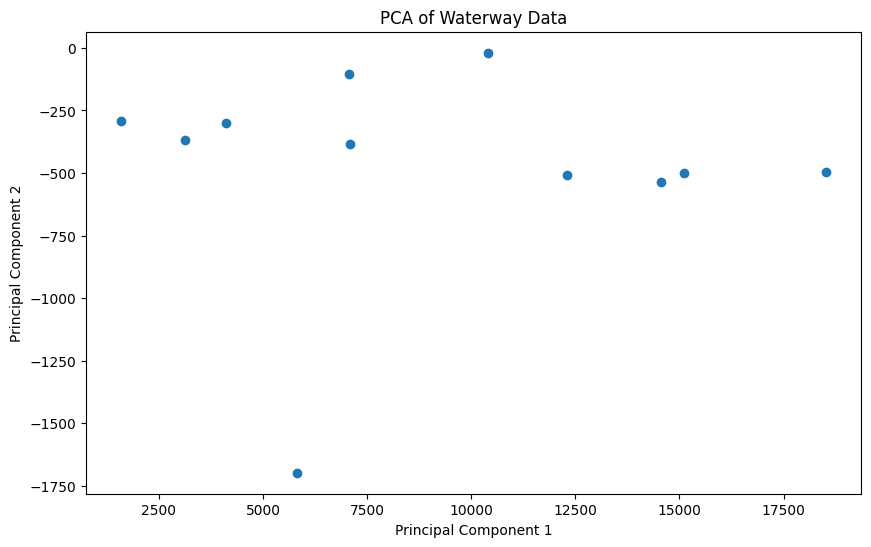

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(final_reduced_data[:, 0], final_reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Waterway Data')
plt.show()